In [7]:
import pandas as pd

%matplotlib inline


In [8]:
#Прочитайте csv файл (використовуйте функцію read_csv)
books = pd.read_csv("bestsellers with categories.csv")
books

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [9]:
#Виведіть перші п'ять рядків (використовується функція head)
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [10]:
#Виведіть розміри датасету (використовуйте атрибут shape)
books.shape

(550, 7)

In [11]:
print(f"Відповідь: Про скільки книг зберігає дані датасет? {books.shape[0]}")

Відповідь: Про скільки книг зберігає дані датасет? 550


In [12]:
#можна просто присвоїти список нових імен цьому атрибуту

books = books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
books.head()

AttributeError: 'list' object has no attribute 'columns'

In [ ]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
books.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [ ]:
for col in books.isna().sum():
    if col != 0:
        trigger = "Так"
        break
    else:
        trigger = "Ні"
    
print(f"Відповідь: Чи є в якихось змінних пропуски? {trigger}")

Відповідь: Чи є в якихось змінних пропуски? Ні


In [ ]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
books.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [ ]:
print(f"Відповідь: Які є унікальні жанри? {books.genre.unique()}")

Відповідь: Які є унікальні жанри? ['Non Fiction' 'Fiction']


<Axes: ylabel='Frequency'>

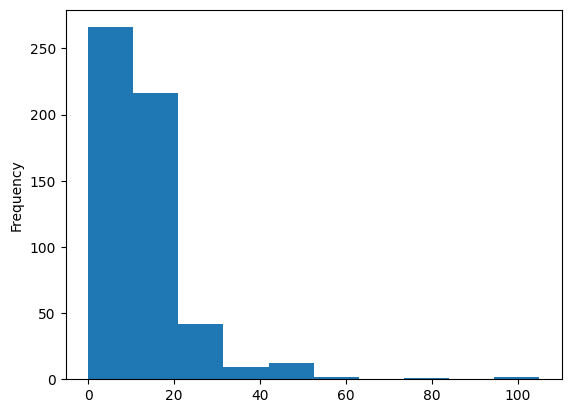

In [ ]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
books.price.plot(kind="hist")

In [ ]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
price = books.agg({'price': ['min', 'max', 'mean', 'median']})
price

,price
min,0.0
max,105.0
mean,13.1
median,11.0


In [ ]:
price_max = price.agg({'price': ['max']})
print(f"Відповідь: Максимальна ціна? {price_max}")
print(f"Відповідь: Мінімальна ціна?")
print(f"Відповідь: Середня ціна?")
print(f"Відповідь: Медіанна ціна?")

NameError: name 'books' is not defined